### Loading Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as ssig

df = pd.read_csv('10.csv')
X = df.iloc[:, 1]

### LPF

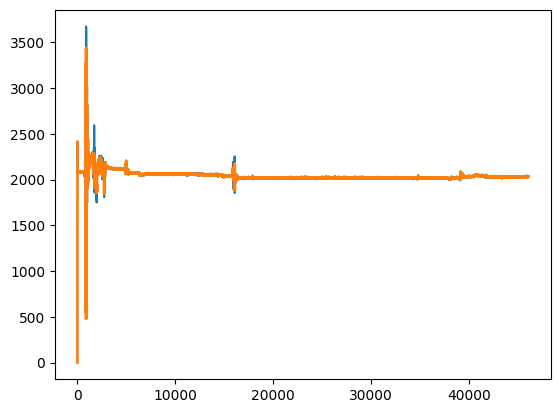

In [34]:
def lowpass(fc, fs, order=5):
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b, a = ssig.butter(order, normal_fc, btype='low', analog=False)
    return b, a


def lowpass_filter(data, fc, fs, order=5):
    b, a = lowpass(fc, fs, order=order)
    y = ssig.lfilter(b, a, data)
    return y

order = 6
fs = 32
fc = 3.7

b, a = lowpass(fc, fs, order)

y = lowpass_filter(X, fc, fs, order)
plt.plot(X, alpha = 1.0)
plt.plot(y, linewidth=2, label='LPF')

### MVA

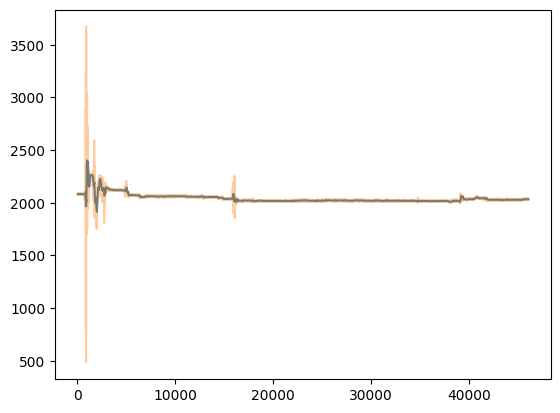

In [29]:
def mva_filter(data,window_size):
  filtered_data = data.rolling(window=window_size).mean()
  return filtered_data


Windows Size 1

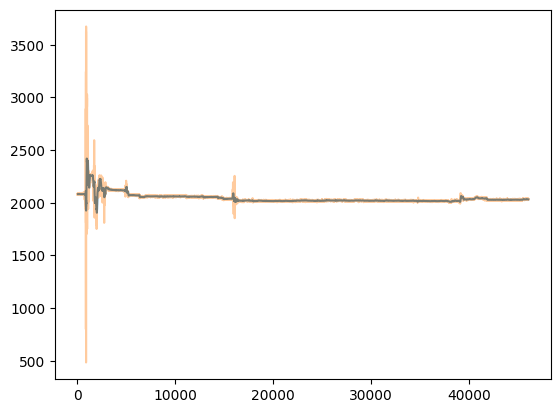

In [35]:
mva_filter(X,60).plot(label='Moving Average (MVA)')
plt.plot(X, label='X',alpha=0.4)

Windows Size 2

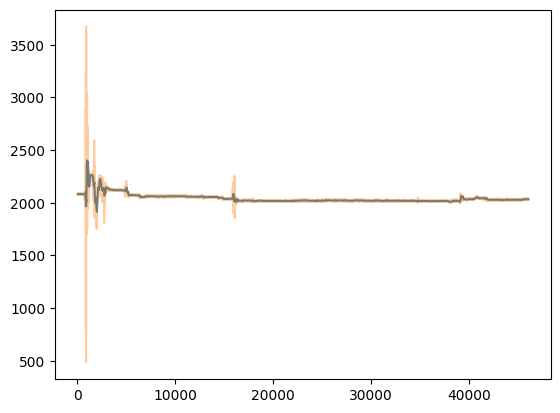

In [37]:
mva_filter(X,80).plot(label='Moving Average (MVA)')
plt.plot(X, label='X',alpha=0.4)

Windows Size 3

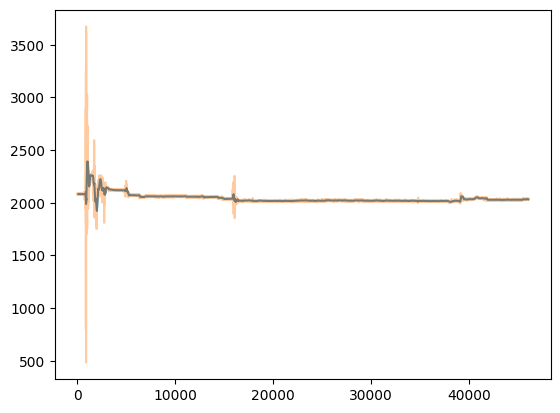

In [39]:
mva_filter(X,100).plot(label='Moving Average (MVA)')
plt.plot(X, label='X',alpha=0.4)